# INFO 411 - Saniya - 6210661

# Assignment 2

___
# K Means Clustering Assignment

For this project we will attempt to use KMeans Clustering to cluster penguine species.

___
It is **very important to note, we actually have the labels for this data set, but we will NOT use them for the KMeans clustering algorithm, since that is an unsupervised learning algorithm.** 

When using the Kmeans algorithm under normal circumstances, it is because you do not have labels. In this case we will use the labels to try to get an idea of how well the algorithm performed, but you won't usually do this for Kmeans, so the classification report and confusion matrix at the end of this project, do not truly make sense in a real world setting!.
___

## The Data

We will use a data frame with 344 entries. The dataset contains information about physical appearance of some penguine species. you can import this dataset directly from seaborn.


## Section1: Import data   (2 marks)
### Import Libraries

** Import the libraries you usually use for data analysis.**

In [1]:
#import the necessary libraries that will be required in the project
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Get the Data

** Read in the Data file using read_csv. Figure out how to set the first column as the index.**

In [230]:
#read the dataset into the datafram df
df = sns.load_dataset("penguins")

**Check the head of the data**

In [151]:
#check the first 5 entries in the df
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


**Check the info() and describe() methods on the data. Comment on number of unique cases in categorical columns**

In [152]:
#get the field count for the df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [154]:
#get the statistical summary of the df
df.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


In [162]:
print(f"Unique in species: {df['species'].unique()}")
print(f"Unique in island: {df['island'].unique()}")
print(f"Unique in sex: {df['sex'].unique()}")

Unique in species: ['Adelie' 'Chinstrap' 'Gentoo']
Unique in island: ['Torgersen' 'Biscoe' 'Dream']
Unique in sex: ['Male' 'Female' nan]


As we can see in the categorical columns: for species there are 3 different unique categories which are 'Adelie' 'Chinstrap' 'Gentoo'. For the island, there are 3 unique categories which are: 'Torgersen' 'Biscoe' 'Dream'. And for sex there are 3 unique categories: 'Male', 'Female', and nan.

## Section 2: Data Cleaning (15 marks)

Let's see what are we working with.
First find out if there are any missing or null values. (2)

In [166]:
df.isnull()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,True,True,True,True,True
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
339,False,False,True,True,True,True,True
340,False,False,False,False,False,False,False
341,False,False,False,False,False,False,False
342,False,False,False,False,False,False,False


In [169]:
df.isnull().count()

species              344
island               344
bill_length_mm       344
bill_depth_mm        344
flipper_length_mm    344
body_mass_g          344
sex                  344
dtype: int64

Visualize the missing values using a heatmap. (3)

<AxesSubplot:>

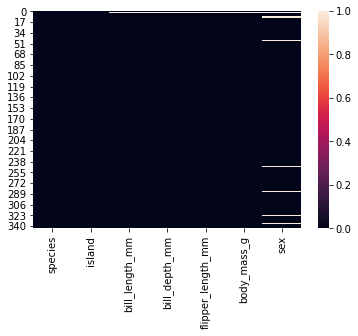

In [170]:
sns.heatmap(df.isnull(), cbar=True)

As we can see from the above results there are a few missing values especially spotted in the sex column for the penguins. And all the records are missing near the beginning of the dataframe.

If the number of missing values is above 30% of your available data, discard it. If it is small, fill the null values with appropriate replacements (be smart!). (10)

In [173]:
100*df.isnull().sum()/len(df)

species              0.000000
island               0.000000
bill_length_mm       0.581395
bill_depth_mm        0.581395
flipper_length_mm    0.581395
body_mass_g          0.581395
sex                  3.197674
dtype: float64

In [231]:
df['sex'].fillna(df['sex'].mode()[0],inplace=True)

In [232]:
missingEntries = ['bill_length_mm', 'bill_depth_mm','flipper_length_mm', 'body_mass_g']
for x in missingEntries:
    df[x].fillna(df[x].mean(),inplace=True)

In [233]:
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.10000,18.70000,181.000000,3750.000000,Male
1,Adelie,Torgersen,39.50000,17.40000,186.000000,3800.000000,Female
2,Adelie,Torgersen,40.30000,18.00000,195.000000,3250.000000,Female
3,Adelie,Torgersen,43.92193,17.15117,200.915205,4201.754386,Male
4,Adelie,Torgersen,36.70000,19.30000,193.000000,3450.000000,Female


In the above sections we changed the missing sex fields and replaces it with the most common occurring sex in the columns.
And for the missing column entreis for one of the penguin, we replaced it with the mean of the other entries.

In [182]:
df.species.value_counts()

Adelie       152
Gentoo       124
Chinstrap     68
Name: species, dtype: int64

In [183]:
df.sex.value_counts()

Male      179
Female    165
Name: sex, dtype: int64

In [184]:
df.island.value_counts()

Biscoe       168
Dream        124
Torgersen     52
Name: island, dtype: int64

## Section 3: EDA  (12 marks)

Let's visualize some of our data.


Create a scatterplot of bill_length_mm vs bill_depth_mm where the points are colored according to their species. (3)

<AxesSubplot:xlabel='bill_length_mm', ylabel='bill_depth_mm'>

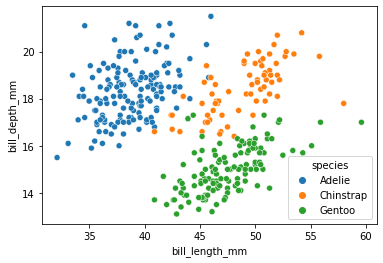

In [185]:
#check realtion between bill length and species
sns.scatterplot(data=df, x="bill_length_mm", y="bill_depth_mm", hue="species")

From the above graph we can see that there is no corellation between the species and the bill length of the penguins. But we can see that Adeile, chinastrap and gentoo have segregated bill lengths, which means that all the penguins of the same species have the bill length which falls under a certain range of length. For instance, we can see that Adelie bill length is ranging from 10 to 46.

Create a countplot of the species column. (2)

<AxesSubplot:xlabel='species', ylabel='count'>

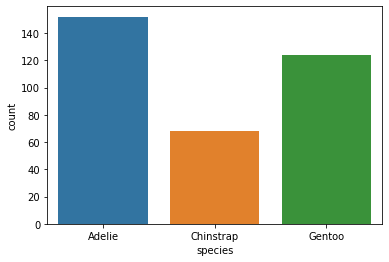

In [186]:
#we can see how many penguins are there in each of the species of penguin.
sns.countplot(data=df, x="species")

Using any appropriate plot, display the distribution of penguine species across the islands. (3)

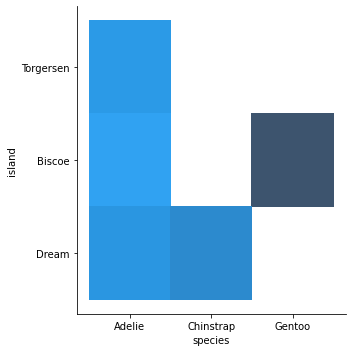

In [187]:
sns.displot(data=df, x='species', y='island')
plt.show()

For the above graph we can clearly see that the species Adelie is mostly distributed in the island Dream and Torgersen, with a slightly less comparitive distribution in Biscoe. While the chinastrap species distribution is concentrated in only Dream Island. Finally the Gentoo penguins have a strong distribution only in the Biscoe island.

Which species are heavier in weight? (find out by plotting, mention them in comment) (4)

<AxesSubplot:xlabel='species', ylabel='body_mass_g'>

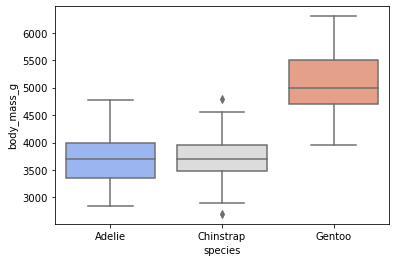

In [188]:
sns.boxplot(x=df.species,y=df.body_mass_g, palette='coolwarm')

From the above graphs we can clearly spot which species is more heavier than the other. We can see that Gentoo has a greater range of body mass which means that they have a greater range for their weight. It spans from 4100 to 6600 grams. While Chinastap body mass ranges from 2700 to 4900 grams. And Adelie body mass ranges from 2900 to 4700 grams. In comparision to Adelie and Chinastrap, Gentoo penguins are much heavier as their interquartile range is also wider than the other two. And Adelie penguins are heavier in comparision to Chinastrap, ad their range is also larger and their interquartile range is also wider compared to chinastrap.

## Section 4: K Means Cluster Creation (18 marks)

Now it is time to create the Cluster labels! You may have to encode the categorical values.

** Import KMeans from SciKit Learn.** (2)

In [234]:
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.10000,18.70000,181.000000,3750.000000,Male
1,Adelie,Torgersen,39.50000,17.40000,186.000000,3800.000000,Female
2,Adelie,Torgersen,40.30000,18.00000,195.000000,3250.000000,Female
3,Adelie,Torgersen,43.92193,17.15117,200.915205,4201.754386,Male
4,Adelie,Torgersen,36.70000,19.30000,193.000000,3450.000000,Female


In [236]:
df_K = df

In [237]:
df_K.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.10000,18.70000,181.000000,3750.000000,Male
1,Adelie,Torgersen,39.50000,17.40000,186.000000,3800.000000,Female
2,Adelie,Torgersen,40.30000,18.00000,195.000000,3250.000000,Female
3,Adelie,Torgersen,43.92193,17.15117,200.915205,4201.754386,Male
4,Adelie,Torgersen,36.70000,19.30000,193.000000,3450.000000,Female


In [238]:
# Target variable also need to be encoded
df_K['species']=df_K['species'].map({'Adelie':0,'Gentoo':1,'Chinstrap':2})

In [240]:
# creating dummy variables for categorical features
dummies = pd.get_dummies(df_K[['island','sex']],drop_first=True)

In [241]:
df_K.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,0,Torgersen,39.10000,18.70000,181.000000,3750.000000,Male
1,0,Torgersen,39.50000,17.40000,186.000000,3800.000000,Female
2,0,Torgersen,40.30000,18.00000,195.000000,3250.000000,Female
3,0,Torgersen,43.92193,17.15117,200.915205,4201.754386,Male
4,0,Torgersen,36.70000,19.30000,193.000000,3450.000000,Female


In [242]:
df_K2 = df.drop(['island','sex'],axis=1)
target = df_K2.species
df_K3 = df_K2.drop('species',axis=1)

In [243]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [244]:
#we will normalize the data by using the scaler.transform to ensure all data is equal in magnitude
scaler.fit(df_K3)
df_scaled = scaler.transform(df_K3)

In [245]:
#we will use the dummies and the specied column in the final datafram hence concatenate it
df_scaled = pd.DataFrame(df_scaled,columns=df_K3.columns[:4])
df_Final = pd.concat([df_scaled,dummies,target],axis=1)

In [246]:
df_Final.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,island_Dream,island_Torgersen,sex_Male,species
0,-8.870812e-01,7.877425e-01,-1.422488,-0.565789,0,1,1,0
1,-8.134940e-01,1.265563e-01,-1.065352,-0.503168,0,1,0,0
2,-6.663195e-01,4.317192e-01,-0.422507,-1.192003,0,1,0,0
3,1.307172e-15,1.806927e-15,0.000000,0.000000,0,1,1,0
4,-1.328605e+00,1.092905e+00,-0.565361,-0.941517,0,1,0,0


** Create an instance of a K Means model with 2 clusters.** (2)

In [353]:
from sklearn.cluster import KMeans
KMeans = KMeans(n_clusters=2,n_init=10)

**Fit the model to all the data except for the species column.**(2)

In [354]:
#we will fit the model without the target labels
KMeans.fit(df_Final.drop('species',axis=1))

KMeans(n_clusters=2)

** What are the cluster center vectors?** (2)

In [355]:
KMeans.cluster_centers_

array([[ 6.59148146e-01, -1.10319208e+00,  1.16224861e+00,
         1.09494883e+00,  1.66533454e-16,  8.32667268e-17,
         5.28455285e-01],
       [-3.66856208e-01,  6.13993784e-01, -6.46862351e-01,
        -6.09405909e-01,  5.61085973e-01,  2.35294118e-01,
         5.15837104e-01]])

Store the species labels in variable "y" and store the cluster labels in "y_predict". Using the following function create a confusion matrix. Is your clustering algorithm accurate? justify your results. (10)

In [364]:
#these are the target labels
y = df_Final['species']

In [363]:
#these are the predicted results
y_predict= KMeans.fit_predict(df_Final.drop('species',axis=1)) 
y_predict

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [365]:
confMat = pd.crosstab(y_predict, y)
print(confMat)

species    0    1   2
row_0                
0        152    1  68
1          0  123   0


In [366]:
confusion_matrix(y_predict, y)

array([[152,   1,  68],
       [  0, 123,   0],
       [  0,   0,   0]], dtype=int64)

In [367]:
print(classification_report(df_Final.species,y_predict))

              precision    recall  f1-score   support

           0       0.69      1.00      0.82       152
           1       1.00      0.99      1.00       124
           2       0.00      0.00      0.00        68

    accuracy                           0.80       344
   macro avg       0.56      0.66      0.60       344
weighted avg       0.66      0.80      0.72       344



C:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


The clustering algorithm is working very well, from the above we can see that in the first cell 152 out of 152 penguins were correctly classified. There was no misclassification. It was a pure classification. For the second species, there was a slight misclassification as 1 penguin was wrongly classified, but it is not too bad. Finally in the last specied we can see that there is a big misclassification her, 68 out of 68 penguins were wrongly classified, it is a false classification. This needs to be imporved. 

## Section 5: Evaluation (18 marks)

There is no perfect way to evaluate clustering if you don't have the labels, however since this is just an exercise, we do have the labels, so we take advantage of this to evaluate our clusters, keep in mind, you usually won't have this luxury in the real world.

**Refer back to last question, if you see misclassified/clustered data points, try to improve the clustering using any pre-processing or model options you know** (15)

C:\Users\User\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


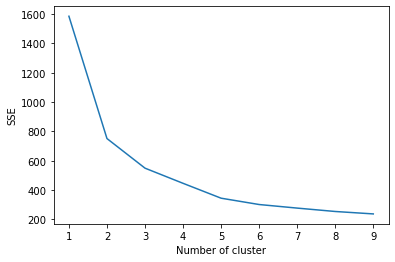

In [269]:
#we will use SSE method to evaluate the model
from sklearn.cluster import KMeans
sse = {}
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(df_Final.drop("species",1))
   
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

From the elbow method we can understand  what could be a good k number of clusters would be based on the sum of squared distance (SSE) between data points and their assigned clusters’ centroids. The nest k would be the spot where SSE starts to flatten out and forming an elbow. From the above graph it seems to be 2. Lets retry to fit the model with 3 as the number of k and see what is the result.

In [346]:
from sklearn.cluster import KMeans
KMeans = KMeans(n_clusters=3,n_init=10)

In [347]:
KMeans.fit(df_Final.drop('species',axis=1))

KMeans(n_clusters=3)

In [348]:
y = df_Final['species']

In [349]:
y_predict= KMeans.fit_predict(df_Final.drop('species',axis=1)) 
y_predict

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0,
       2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0,
       2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0,
       0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [350]:
confMat = pd.crosstab(y_predict, y)
print(confMat)

species    0    1   2
row_0                
0         11    1  63
1          0  123   0
2        141    0   5


In [351]:
confusion_matrix(y_predict, y)

array([[ 11,   1,  63],
       [  0, 123,   0],
       [141,   0,   5]], dtype=int64)

Determine your final accuracy. (3)

In [352]:
print(classification_report(df_Final.species,y_predict))

              precision    recall  f1-score   support

           0       0.15      0.07      0.10       152
           1       1.00      0.99      1.00       124
           2       0.03      0.07      0.05        68

    accuracy                           0.40       344
   macro avg       0.39      0.38      0.38       344
weighted avg       0.43      0.40      0.41       344



From the above metrics we tries to test the model again with K as 3 and we got these results:
The accuracy is 40% which is not so bad considering that we have trained this model without the labels. The confusion matrix shows that for the 1st species only 11 were righty classifies, and 141 were wrongly classified. For the 2nd species there was only 1 which was wrongly classified. and for the last one there were 5 which were rightly classifies. This somehow seems like a not so good classification compared to the first run (with K=2). Where the accuracy of the model was also better (80%)
Hence, it is a good model but we would prefer to keep K as 2, and try to find other means to imporve the accuracy of the model.